# 线性回归

##### **基本定义**

首先，在学习深度网络之前，我们先学习浅层网络，这是重要的基础。其中最基础的就是线性回归。回归是研究一个或多个自变量和因变量之间关系建模的一类方法。一个典型的将房屋价格（因变量）代表为特征的加权和（面积和房龄）的典型例子：

$$ \mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{age} \cdot \mathrm{age} + b $$

一个通用的线性回归预测模型可以表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

##### **向量形式转换**

为了简洁表示，我们可以将所有特征 $x_1$, $x_2$, $\ldots$, $x_d$ 组成一个列向量, $\mathbf{x} \in \mathbb{R}^d$ 意味着 $\mathbf{x}$ 是一个有 $d$ 个实数特征的列向量：

$$
\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_d
\end{bmatrix} \in \mathbb{R}^d
$$,

将所有权重 $w_1$, $w_2$, $\ldots$, $w_d$ 也组成一个列向量, $\mathbf{w} \in \mathbb{R}^d$ 意味着 $\mathbf{x}$ 是一个有 $d$ 个实数特征的列向量：

$$
\mathbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_d
\end{bmatrix} \in \mathbb{R}^d 
$$.

这样，模型就可以写成向量内积（点积）的形式：

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

特征向量 $\mathbf{x} \in \mathbb{R}^d$ 是一个 列向量$（d \times 1）$;
权重向量 $\mathbf{w} \in \mathbb{R}^d$ 也是一个 列向量$（d \times 1）$;
为了点积的乘法合法性，我们需要把其中一个转置成行向量。你也可以反过来写成：

$$
\mathbf{x}^\top \mathbf{w}
$$

其中，点积（dot product）$\mathbf{w}^\top \mathbf{x}$ 的计算方式为：

$$
\mathbf{w}^\top \mathbf{x} = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d
$$

##### **数据集向量形式转换**

用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$ 可以很方便地引用我们整个数据集的$n$个样本。其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征:

- $n$：表示样本的数量（即数据集中的行数）；
- $d$：表示每个样本的特征维度（即每个样本有多少个特征，对应列数）；
- $\mathbf{X}_{i,:} \in \mathbb{R}^d$：表示第 $i$ 个样本的特征向量（第 $i$ 行）；
- $\mathbf{X}_{:,j} \in \mathbb{R}^n$：表示第 $j$ 个特征在所有样本中的取值（第 $j$ 列）；

因此：

$$
\mathbf{X} =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd}
\end{bmatrix}
\in \mathbb{R}^{n \times d}
$$

在这个表示中：
- 每一行 $\mathbf{x}^{(i)} = [x_{i1}, x_{i2}, \ldots, x_{id}]$ 是一个样本，共 $n$ 行；
- 每一列对应一个特征（如面积, 房龄等），共 $d$ 个特征。

对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$
可以通过矩阵-向量乘法表示为：

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

其中,
- $\mathbf{X} \in \mathbb{R}^{n \times d}$：每一行是一个样本，共 n 个样本，每个样本 d 个特征；
- $\mathbf{w} \in \mathbb{R}^d$：权重向量；
- $\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} \in \mathbb{R}^n$：预测结果向量。

所以直接相乘合法：$\mathbf{X} \mathbf{w} \in \mathbb{R}^{n \times 1}$
代表 $n$ 个样本对应的预测值。这相当于每一行 $\mathbf{x}^{(i)}$ 与 $\mathbf{w}$ 做了点积。

单个样本时，我们写 $\mathbf{w}^\top \mathbf{x}$ 是为了合法地做列向量间的点积。而矩阵形式 $\mathbf{X} \mathbf{w}$ 已经默认每行是一个样本，无需再转置，直接可以批量点积。

##### **训练目标**

对于训练集$\mathbf{X}$以及给定标签集$\mathbf{y}$，线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$，让误差尽可能小。很难找到一个真实数据集完全符合这个方程，即使我们确信我们面对的问题完全符合，我们也会加入噪声项观察误差带来的影响。我们还需要两个东西用于训练:
- 模型质量的度量方式
- 能够更新模型以提高质量的方法

##### **损失函数**

损失函数（loss function）能够量化目标的实际值与预测值之间的差距。通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。

回归问题中最常用的损失函数是平方误差函数。当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些（因为当我们对损失函数求导后常数系数为1）。我们想知道当我们微调某个参数（比如 第$j$个特征的权重$w_j$）时，损失函数 $l^{(i)}$ 是上升还是下降。

我们使用平方误差 $\frac{1}{2}(\hat{y} - y)^2$ 是因为它：
- 数学上可导且光滑，便于优化；
- 惩罚误差较大时更严重，强调拟合准确；
- 对应高斯噪声的最大似然估计，有理论依据；
- 计算简单、梯度形式优雅，便于推导与实现。

![用线性模型拟合数据。](./img/fit-linreg.svg)

为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），这组参数能最小化在所有训练样本上的总损失。

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

##### **解析解**

解析解的意思是可以直接公式推断出来的，不需要迭代等近似算法，而是可以计算出精确值。

$$L(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

同时，广播偏置，所有预测值可以写成向量：

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b \mathbf{1}$$

其中 $\mathbf{1} \in \mathbb{R}^n$ 是全 1 的列向量（用来广播偏置）。

定义误差向量：

$$\boldsymbol{\varepsilon} = \hat{\mathbf{y}} - \mathbf{y} = \mathbf{X} \mathbf{w} + b \mathbf{1} - \mathbf{y}$$

则平方误差和可以写为向量的范数平方：

$$\sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right)^2 = \| \boldsymbol{\varepsilon} \|^2 = \| \mathbf{X} \mathbf{w} + b \mathbf{1} - \mathbf{y} \|^2$$

我们可以得到向量化的总误差:

$$L(\mathbf{w}, b) = \frac{1}{2n} \| \mathbf{X} \mathbf{w} + b \mathbf{1} - \mathbf{y} \|^2$$

还可以将 $b$ 合并进 $\mathbf{w}$：
- 在 $\mathbf{X}$ 前添加一列全 1，得到 $\tilde{\mathbf{X}} \in \mathbb{R}^{n \times (d+1)}$
- 将 $b$ 和 $\mathbf{w}$ 合并成 $\tilde{\mathbf{w}} \in \mathbb{R}^{d+1}$

引入扩展矩阵 $\tilde{\mathbf{X}} \in \mathbb{R}^{n \times (d+1)}$：

$$\tilde{\mathbf{X}} = \begin{bmatrix}
1 & x^{(1)}_1 & \cdots & x^{(1)}_d \\
1 & x^{(2)}_1 & \cdots & x^{(2)}_d \\
\vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)}_1 & \cdots & x^{(n)}_d \\
\end{bmatrix}$$

以及扩展权重向量, $b$放这里后续方便直接对其求导查找最优解：

$$\tilde{\mathbf{w}} = \begin{bmatrix}
b \\
w_1 \\
\vdots \\
w_d
\end{bmatrix}$$

最终损失函数变为：

$$L(\tilde{\mathbf{w}}) = \frac{1}{2n} \| \tilde{\mathbf{X}} \tilde{\mathbf{w}} - \mathbf{y} \|^2$$

什么是向量的“平方”? 

$$\| \mathbf{a} \|^2 = \mathbf{a}^\top \mathbf{a}$$

这个其实是向量的 欧几里得范数的平方，你可以类比标量平方：
- 对于标量：$a^2$
- 对于列向量：$\| \mathbf{a} \|^2 = a_1^2 + a_2^2 + \cdots + a_n^2 = \mathbf{a}^\top \mathbf{a}$

举例：
$$\mathbf{a} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
\Rightarrow
\mathbf{a}^\top \mathbf{a} = [1 \; 2 \; 3] \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = 1^2 + 2^2 + 3^2 = 14$$

所以我们有：

$$L(\tilde{\mathbf{w}}) = \frac{1}{2n}\| \tilde{\mathbf{X}} \tilde{\mathbf{w}} - \mathbf{y} \|^2 = \frac{1}{2n}(\tilde{\mathbf{X}} \tilde{\mathbf{w}} - \mathbf{y})^\top (\tilde{\mathbf{X}} \tilde{\mathbf{w}} - \mathbf{y})=\frac{1}{2n}(\tilde{\mathbf{X}}^\top \tilde{\mathbf{w}}^\top \tilde{\mathbf{X}} \tilde{\mathbf{w}-2\tilde{\mathbf{X}}^\top \tilde{\mathbf{w}}^\top}\mathbf{y}+\mathbf{y}^\top\mathbf{y})$$

利用向量求导公式

$$\nabla_{\tilde w}(\tilde w^\top A\,\tilde w)\;=\;2A\,\tilde w,\quad
\nabla_{\tilde w}(c^\top\tilde w)\;=\;c,$$

并注意常数项$（\mathbf y^\top\mathbf y）$对 $\tilde w$ 导数为零，可得

$$\nabla_{\tilde{\mathbf w}} L(\tilde{\mathbf{w}})
= \nabla_{\tilde{\mathbf w}} \frac{1}{2n} ({\mathbf{X}}^\top \tilde{\mathbf{w}}^\top \tilde{\mathbf{X}} \tilde{\mathbf{w}} - 2\tilde{\mathbf{X}}^\top \tilde{\mathbf{w}}^\top \mathbf{y} + \mathbf{y}^\top\mathbf{y})   =\frac{1}{2n} \cdot 2\,\tilde{\mathbf X}^\top(\tilde{\mathbf X}\,\tilde{\mathbf w} - \mathbf y),$$

最优点满足

$$\tilde{\mathbf X}^\top(\tilde{\mathbf X}\,\tilde{\mathbf w}^* - \mathbf y) \;=\; \mathbf0
\;\Longrightarrow\;
\tilde{\mathbf X}^\top\tilde{\mathbf X}\,\tilde{\mathbf w}^* \;=\; \tilde{\mathbf X}^\top\mathbf y,$$

转换可得

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

##### **随机梯度下降**

即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。在许多任务上，那些难以优化的模型效果要更好。我们用到一种名为梯度下降（gradient descent）的方法。

这种方法几乎可以优化所有深度学习模型。它通过不断地在损失函数递减的方向上更新参数来降低误差。梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）。

但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。

首先我们要知道梯度和偏导数：

- 单个偏导只关心“当 $b$ 增量时，$L$ 怎么变”。∂ —— 表示对某一个变量求导。
$$\displaystyle \frac{\partial L}{\partial b}$$ 

- 梯度是一个 $(d+1)$-维向量，给出了在所有参数方向上的最陡“上升”斜率。∇ —— 表示对全部变量求导（或对向量变量求导），结果是一个梯度向量。
$$\displaystyle \nabla_{(\mathbf w,b)}L = \Bigl[\frac{\partial L}{\partial w_1},\dots,\frac{\partial L}{\partial w_d},\frac{\partial L}{\partial b}\Bigr]^\top$$

在单个样本$i$上，梯度损失为:

$$\displaystyle \partial_{(\mathbf{w},b)} l^{(i)} = \nabla_{(\mathbf w,b)}l^{(i)} = \Bigl[\frac{\partial l^{(i)}}{\partial w_1},\dots,\frac{\partial l^{(i)}}{\partial w_d},\frac{\partial l^{(i)}}{\partial b}\Bigr]^\top = \Bigl[\frac{\partial l^{(i)}}{\partial \mathbf{w}},\frac{\partial l^{(i)}}{\partial b}\Bigr]^\top$$

在单个样本$i$上，梯度函数为:

$$l^{(i)}(\mathbf{w}, b)
= \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
= \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2,$$

设置预测误差:

$$e^{(i)} = \hat{y}^{(i)} - y^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)},$$

得到:

$$\frac{\partial l^{(i)}}{\partial \mathbf{w}}
= \frac{1}{2} \cdot 2e^{(i)} \cdot \frac{\partial e^{(i)}}{\partial \mathbf{w}}
= e^{(i)} \cdot \mathbf{x}^{(i)}.$$

$$\frac{\partial l^{(i)}}{\partial b}
= \frac{1}{2} \cdot 2e^{(i)} \cdot \frac{\partial e^{(i)}}{\partial b}
= e^{(i)} \cdot 1 = e^{(i)}.$$

所以有:

$$\partial_{(\mathbf{w},b)} l^{(i)} = \Bigl[\frac{\partial l^{(i)}}{\partial \mathbf{w}},\frac{\partial l^{(i)}}{\partial b}\Bigr]^\top = \Bigl[e^{(i)} \cdot \mathbf{x}^{(i)}, e^{(i)} \cdot 1\Bigr]^\top = \left(\hat{y}^{(i)} - y^{(i)}\right) \begin{bmatrix} \mathbf{x}^{(i)} \\ 1 \end{bmatrix}$$

在每次迭代中，我们首先随机抽样一个小批量batch $\mathcal{B}$ 它是由固定数量的训练样本组成的。然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。我们用下面的数学公式来表示这一更新过程：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下：

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$

$|\mathcal{B}|$表示每个小批量中的样本数，这也称为批量大小（batch size）。$\eta$表示学习率（learning rate）。批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。

这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。调参（hyperparameter tuning）是选择超参数的过程。超参数通常是我们根据训练迭代结果来调整的，而训练迭代结果是在独立的验证数据集（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，这一挑战被称为泛化（generalization）。

##### **预测与推断**

给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。给定特征估计目标的过程通常称为预测（prediction）或推断（inference）。推断模型一般有着更好的可解释性，所以称之为推断，例如线形回归模型就是又可以预测又可以被称之为推断，因为不同特征的权重是清晰的，不会是一个黑盒。

##### **矢量化加速**

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。为了实现这一点，需要我们对计算进行矢量化，从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

矢量化就是指把操作写成矩阵运算的形式，而不是显式地在 Python 中用循环一个一个处理数据。

假设我们要做线性回归，计算预测值：

$$\hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b$$

如果有一个 batch 的数据，共 $m$ 个样本，每个样本维度是 $d$，我们可以把所有样本拼成一个矩阵 $\mathbf{X} \in \mathbb{R}^{m \times d}$，把权重 $\mathbf{w} \in \mathbb{R}^{d}$，偏置 $b \in \mathbb{R}$。

那么我们可以矢量化写作：

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b$$

这行代码在 NumPy 或 PyTorch 中可以一口气计算所有样本的预测值，而不是 for 循环一个一个来。

In [11]:
import math
import time
import numpy as np
import torch

class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [ ]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])
c = torch.zeros([n])

timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'{timer.stop():.5f} sec')

timer.start()
d = a + b
print(f'{timer.stop():.5f} sec')

0.05068 sec
0.00022 sec


可以看出，使用for循环的计算速度比使用矢量计算的速度慢很多。

##### **正态分布与平方损失**

接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。正态分布（normal distribution），也称为高斯分布（Gaussian distribution），最早由德国数学家高斯（Gauss）应用于天文学研究。
简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

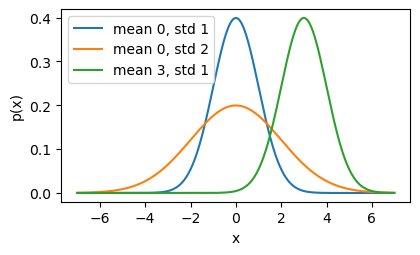

In [15]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
plt.figure(figsize=(4.5, 2.5))
for mu, sigma in params:
    plt.plot(x, normal(x, mu, sigma), label=f'mean {mu}, std {sigma}')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()